## 多性状-组织/细胞类型

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']=' Times New Roman, SimSun'# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
plt.rcParams['font.size'] = 11  # 设置全局字体大小

import warnings
# 禁用所有警告
warnings.filterwarnings("ignore")

# 每个性状显著相关的组织数量分布

In [ ]:
'''
    性状与每个组织是否显著相关（0,1）
'''

core = "core"
traits_name = pd.read_excel(r"E:\00_CeSOP\data\49_traits.xlsx")
alltraits_significant = pd.DataFrame()
for trait in range(1,50):
    # print(trait)
    trait_name = traits_name[traits_name["Number"] == trait]["Trait name"].values[0]
    # trait_name = traits_name[traits_name["Number"] == trait]["Trait 名字"].values[0]
    df = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\%s\top10_%s_lcczscore.csv"%(trait,core))
    df = df.sort_values("tissue")  
    # 创建新列 'a'，根据 'col1' 列的值设置
    df['a'] = df["fisher's pvalue"] > 0.005
    # 将 True 和 False 转换为字符串 'true' 和 'false'
    df['a'] = df['a'].map({True: 0, False: 1})
    alltraits_significant[trait_name] = df['a']
alltraits_significant.index = df["tissue"]
alltraits_significant.to_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_tissues_core.csv")

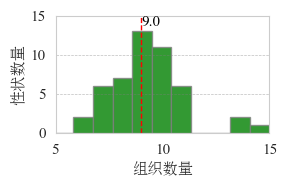

In [36]:
'''
    每个性状显著相关的组织数量分布
'''
alltraits_significant_core = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_tissues_core.csv")
core_tissue_num = alltraits_significant_core.sum().values[1:]
# 计算数据的均值
mean_value = np.mean(core_tissue_num)
plt.figure(figsize=(3,2),dpi = 100)
plt.axhline(y=5, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.axhline(y=10, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.hist(core_tissue_num,  bins=12, color='green',alpha = 0.8,edgecolor='grey')
# 在x轴上绘制表示均值的竖线
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
# 添加注释来标识均值
plt.text(mean_value, plt.ylim()[1], f'{mean_value:.1f}', color='black')
plt.xlim(5,15)
plt.ylim(0,15)
plt.yticks([0, 5, 10, 15])  # 设置 Y 轴刻度
plt.xticks([ 5, 10, 15])  # 设置 Y 轴刻度
plt.xlabel("组织数量")
plt.ylabel("性状数量")
plt.grid(False)
# 自动调整子图间的间距
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\1.png",dpi=2000)
plt.show()

In [ ]:
core = "core"
traits_name = pd.read_excel(r"E:\00_CeSOP\data\49_traits.xlsx")
alltraits_significant = pd.DataFrame()

for trait in range(1,50):
    trait_name = traits_name[traits_name["Number"] == trait]["Trait name"].values[0]
    # trait_name = traits_name[traits_name["Number"] == trait]["Trait 名字"].values[0]
    df = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\celltypes\%s\top10_%s_lcczscore.csv"%(trait,core))
    df = df.sort_values(["tissue","celltype"])  
    # 创建新列 'a'，根据 'col1' 列的值设置
    df['a'] = df["fisher's pvalue"] > 0.005
    # 将 True 和 False 转换为字符串 'true' 和 'false'
    df['a'] = df['a'].map({True: 0, False: 1})
    alltraits_significant[trait_name] = df['a']
alltraits_significant["tissue"] = df["tissue"]
alltraits_significant["celltype"] = df["celltype"]
alltraits_significant.to_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_celltypes_core.csv")

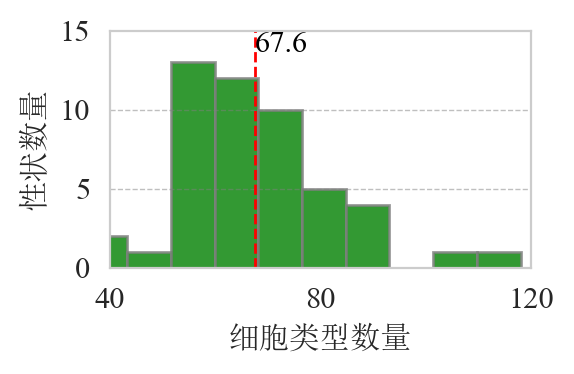

In [37]:
# 每个性状显著相关的细胞类型数量分布
alltraits_significant_core = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_celltypes_core.csv")
core_tissue_num = alltraits_significant_core.sum().values[1:-2]

plt.figure(figsize=(3,2),dpi = 200)
plt.axhline(y=5, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.axhline(y=10, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.hist(core_tissue_num, bins = 10, color='green',alpha = 0.8,edgecolor='grey')
# 计算数据的均值
mean_value = np.mean(core_tissue_num)
# 在x轴上绘制表示均值的竖线
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
# 添加注释来标识均值
plt.text(mean_value, plt.ylim()[1], f'{mean_value:.1f}', color='black')

plt.xlim(40,120)
plt.ylim(0,15)
plt.yticks([0, 5, 10, 15])  # 设置 Y 轴刻度
plt.xticks([ 40, 80, 120])  # 设置 Y 轴刻度
plt.xlabel("细胞类型数量")
plt.ylabel("性状数量")
plt.grid(False)
# 自动调整子图间的间距
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\2.png",dpi=2000)
plt.show()

需要标注的点： ['嗜酸性粒细胞计数', '身高', '晒黑']


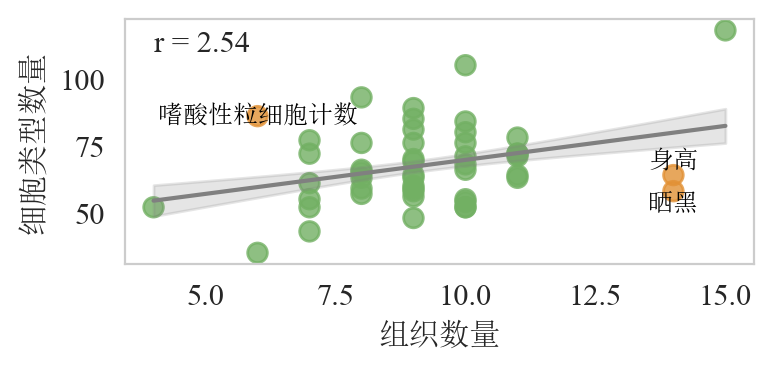

In [34]:
''' 细胞类型特异性强的性状其组织特异性不一定强，散点图'''
# 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

alltraits_significant_core_t = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_tissues_core.csv")
core_tissue_num = np.array(alltraits_significant_core_t.sum().values[1:], dtype=float)
alltraits_significant_core_ct = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_celltypes_core.csv")
core_celltype_num = np.array(alltraits_significant_core_ct.sum().values[1:-2], dtype=float)

# 数据点标签（如基因/项目名）示例：如果第一列为标签列
data_labels = alltraits_significant_core_ct.columns[1:-2].tolist()  # 自行调整列范围

# ✅ 根据阈值筛选需要标注的点（示例：组织数>50 且 细胞类型数>30）
threshold_tissue = 13
threshold_celltype = 80
highlight_indices = [
    i for i, (x, y) in enumerate(zip(core_tissue_num, core_celltype_num))
    if (x > 13 and y < 80) or (x < 7 and y > 80)
]

# 输出被筛选的点标签
highlight_labels = [data_labels[i] for i in highlight_indices]
highlight_labels=['嗜酸性粒细胞计数','身高','晒黑']
print("需要标注的点：", highlight_labels)


# 自定义标签偏移量
offsets = {
    7: (0, 0),   # 第一个点右上方
    20: (0, 5),  # 第二个点左上方
    44: (0, -5),  # 第三个点右下方
}

# 设置整体颜色（普通点绿色）
colors = ['#72b063'] * len(core_tissue_num)
# 将特殊点设为红色
for idx in highlight_indices:
    colors[idx] = '#e29135'

plt.figure(figsize=(4, 2),dpi = 200)
# 创建散点图
plt.scatter(core_tissue_num, core_celltype_num,s = 50,alpha = 0.8,c= colors)

# 添加标签
for idx, label in zip(highlight_indices, highlight_labels):
    dx, dy = offsets.get(idx, (0, 0))  # 默认偏移
    plt.text(core_tissue_num[idx] + dx, core_celltype_num[idx] + dy,
             label, fontsize=9, color='black',
             ha='center', va='center')


# # 添加标签
# for i, label in zip(highlight_indices, highlight_labels):
#     plt.text(core_tissue_num[i], core_celltype_num[i]-1 , label, fontsize=10, color='black',ha='center', va='center')

# 计算线性回归的拟合参数
coefficients = np.polyfit(core_tissue_num, core_celltype_num, 1)
poly = np.poly1d(coefficients)
# 生成拟合线的 x 值
x_fit = np.linspace(core_tissue_num.min(), core_tissue_num.max(), 100)
y_fit = poly(x_fit)
# 计算残差
residuals = core_celltype_num - poly(core_tissue_num)
std_err = np.sqrt(np.sum(residuals**2) / (len(core_celltype_num) - 2))
# 计算拟合线的标准误差
y_err = std_err * np.sqrt(1/len(core_celltype_num) + (x_fit - core_tissue_num.mean())**2 / np.sum((core_tissue_num - core_tissue_num.mean())**2))
# 绘制拟合线
plt.plot(x_fit, y_fit, color='grey', label='Fitted Line')

# 绘制阴影区域
plt.fill_between(x_fit, y_fit - y_err, y_fit + y_err, color='grey', alpha=0.2, label='Confidence Interval')
# 添加回归方程文本
equation_text = f'r = {coefficients[0]:.2f}'
plt.text(x=core_tissue_num.min(), y=core_celltype_num.max(), s=equation_text, fontsize=11, verticalalignment='top', horizontalalignment='left')

# 添加标题和标签
# plt.title('Scatter Plot Example')
plt.xlabel('组织数量')
plt.ylabel('细胞类型数量')
plt.grid(False)
# 自动调整子图间的间距
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\3.pdf",dpi=1000)
# 显示图表
plt.show()

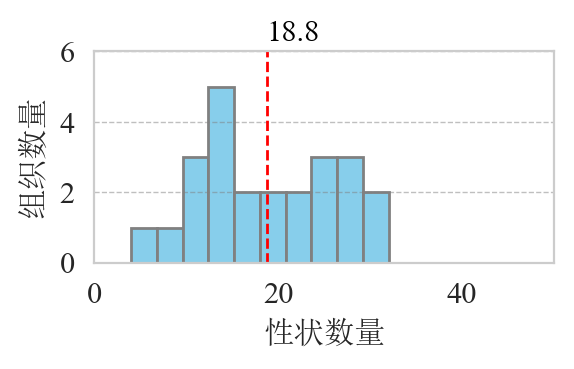

In [35]:
alltraits_significant_core = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_tissues_core.csv")
core_tissue_num = alltraits_significant_core.iloc[:,1:].T.sum()
core_tissue_num = pd.DataFrame(core_tissue_num)
core_tissue_num.columns = ["number"]
core_tissue_num.index = alltraits_significant_core["tissue"]
plt.figure(figsize=(3,2),dpi = 200)
plt.axhline(y=2, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.axhline(y=4, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.axhline(y=6, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.hist(core_tissue_num["number"],bins = 10,color='skyblue', edgecolor='grey')
# 计算数据的均值
mean_value = np.mean(core_tissue_num["number"])
# 在x轴上绘制表示均值的竖线
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
# 添加注释来标识均值
plt.text(mean_value, plt.ylim()[1], f'{mean_value:.1f}', color='black')
plt.xlim(0,50)
plt.ylim(0,6)
plt.yticks([0, 2,4, 6])  # 设置 Y 轴刻度
plt.xticks([0, 20, 40])  # 设置 Y 轴刻度
plt.grid(False)
plt.ylabel("组织数量")
plt.xlabel("性状数量")
# 自动调整子图间的间距
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\4.png",dpi=2000)
plt.show()

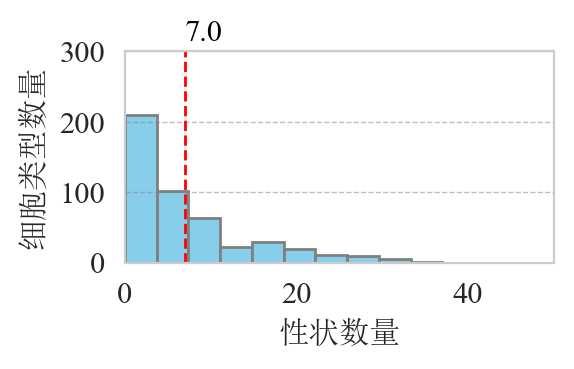

In [34]:
alltraits_significant_core = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_celltypes_core.csv")
core_tissue_num = alltraits_significant_core.iloc[:,1:-2].T.sum()
core_tissue_num = pd.DataFrame(core_tissue_num)
core_tissue_num.columns = ["number"]
core_tissue_num["tissue"] = alltraits_significant_core.iloc[:,-2]
core_tissue_num["celltype"] = alltraits_significant_core.iloc[:,-1]
plt.figure(figsize=(3,2),dpi = 200)
plt.axhline(y=100, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.axhline(y=200, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.axhline(y=300, color='grey', linestyle='--',alpha=0.5,linewidth=0.5)
plt.hist(core_tissue_num["number"],color='skyblue', edgecolor='grey')
# 计算数据的均值
mean_value = np.mean(core_tissue_num["number"])
# 在x轴上绘制表示均值的竖线
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
# 添加注释来标识均值
plt.text(mean_value, plt.ylim()[1], f'{mean_value:.1f}', color='black')

plt.xlim(0,50)
plt.ylim(0,300)
plt.yticks([0, 100,200, 300])  # 设置 Y 轴刻度
plt.xticks([0, 20, 40])  # 设置 Y 轴刻度
plt.grid(False)
plt.ylabel("细胞类型数量")
plt.xlabel("性状数量")
# 自动调整子图间的间距
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\5.png",dpi=2000)
plt.show()

Skin
Muscle
Tongue
Small_Intestine
Large_Intestine
Lymph_Node
Prostate
Kidney
Salivary_Gland
Blood
Mammary
Thymus
Trachea
Bladder
Heart
Pancreas
Spleen
Eye
Fat
Bone_Marrow
Uterus
Vasculature
Liver
Lung


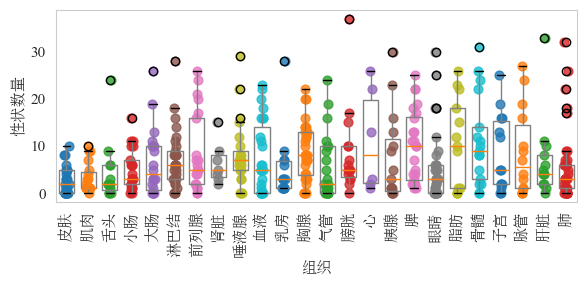

In [41]:
'''倾向于与多个性状相关的组织其中的细胞类型也倾向于与多个性状相关'''
alltraits_significant_core = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_celltypes_core.csv")
core_tissue_num = alltraits_significant_core.iloc[:,1:-2].T.sum()
core_tissue_num = pd.DataFrame(core_tissue_num)
core_tissue_num.columns = ["number"]
core_tissue_num["tissue"] = alltraits_significant_core.iloc[:,-2]
core_tissue_num["celltype"] = alltraits_significant_core.iloc[:,-1]

alltraits_significant_core_t = pd.read_csv(r"E:\00_CeSOP\results\alltraits_significant_yesorno_tissues_core.csv")
core_tissue_num_t = alltraits_significant_core_t.iloc[:,1:].T.sum()
core_tissue_num_t = pd.DataFrame(core_tissue_num_t)
core_tissue_num_t.columns = ["number"]
core_tissue_num_t.index = alltraits_significant_core_t["tissue"]
core_tissue_num_t_sorted = core_tissue_num_t.sort_values("number")
tissues = list(core_tissue_num_t_sorted.index)

## 使用组织的中文名称
names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
# 将列 'a' 转换为分类类型，并按照列表 l 的顺序排序
names['tissue'] = pd.Categorical(names['tissue'], categories=tissues, ordered=True)
# 按照列 'a' 进行排序
names = names.sort_values('tissue')
# 重置索引（可选）
names = names.reset_index(drop=True)

all_number = []
for t in tissues: 
    print(t)
    tissue_ct = core_tissue_num[core_tissue_num['tissue']==t]["number"]
    all_number.append(list(tissue_ct))

# 设置图形大小
plt.figure(figsize=(6, 3))
box = plt.boxplot(all_number,
                  boxprops=dict(color='grey'), 
                  whiskerprops=dict(color='grey'),
                  widths=0.7)  # 增加宽度

# 散点图抖动适配
scatter_width = 0.04  # 可调整
for i, d in enumerate(all_number, 1):
    y = d
    x = np.random.normal(i, scatter_width, size=len(y))  # 根据箱线图宽度微调
    plt.scatter(x, y, alpha=0.8,s=40)

# 添加标题和标签
plt.xticks(range(1, len(all_number) + 1), names["name"], rotation=90)
plt.grid(False)
plt.ylabel("性状数量")
plt.xlabel("组织")

# 自动调整子图间的间距
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\6.pdf",dpi=1000)
plt.show()

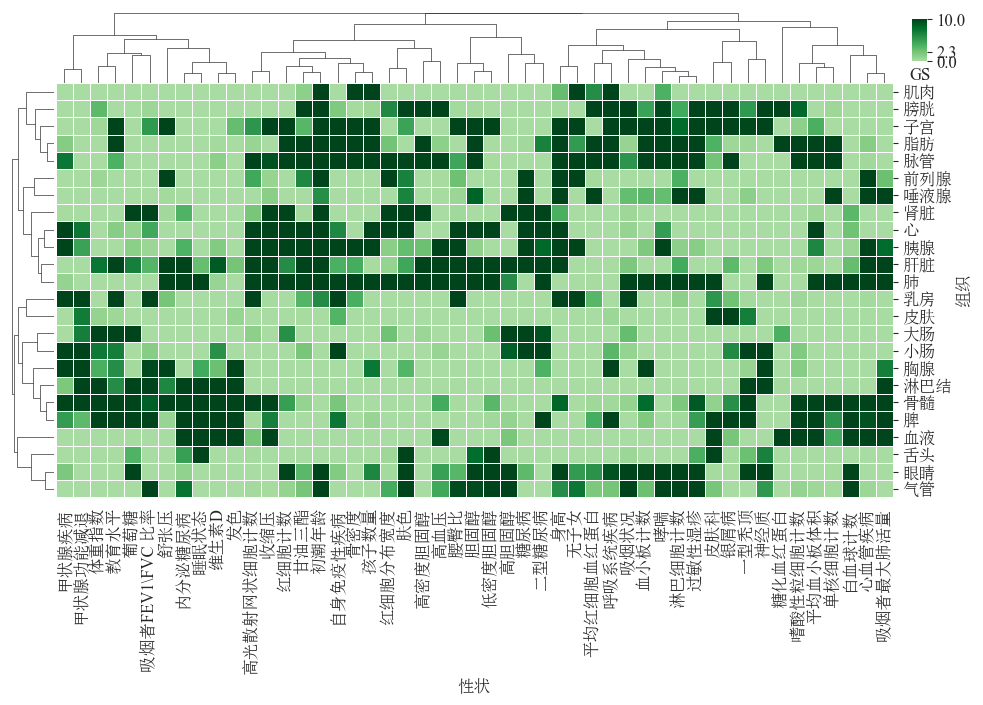

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import scanpy as sc
import warnings
# 禁用所有警告
warnings.filterwarnings("ignore")

# 设置全局字体大小
plt.rcParams['font.size'] = 12  # 设置默认字体大小

epsilon = 1e-10
core = "core"
traits_name = pd.read_excel(r"E:\00_CeSOP\results\49_traits.xlsx")
alltraits_significant = pd.DataFrame()
for trait in range(1,50):
    # trait_name = traits_name[traits_name["Number"] == trait]["Trait name"].values[0]
    trait_name = traits_name[traits_name["Number"] == trait]["Trait 名字"].values[0]
    df = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\%s\top10_%s_lcczscore.csv"%(trait,core))
    df = df.sort_values("tissue")  
    df["log fisher's pvalue"] = -np.log10(df["fisher's pvalue"] + + epsilon)
    alltraits_significant[trait_name] = df["log fisher's pvalue"]
    
## 使用组织的中文名称
names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
# 将列 'a' 转换为分类类型，并按照列表 l 的顺序排序
names['tissue'] = pd.Categorical(names['tissue'], categories=df["tissue"], ordered=True)
# 按照列 'a' 进行排序
names = names.sort_values('tissue')
# 重置索引（可选）
names = names.reset_index(drop=True)
alltraits_significant.index = names['name']
# alltraits_significant.index = df["tissue"]

# 创建热图
x = -np.log10(0.005 + epsilon)

g = sns.clustermap(alltraits_significant, cmap='Greens', figsize=(10, 7),  
               yticklabels=True ,  xticklabels=True,linewidths = 0.5, 
                   method='complete', metric='cosine',
                   # cbar_pos=(0.05, 0.87, 0.02, 0.1),
                   cbar_kws={'ticks':[0,x,10]},
                   # cbar_kws={'ticks':[0,"-log10(0.005)",10]},
                   dendrogram_ratio=(0.05, 0.15),
                   cbar_pos=(0.92, 0.9, 0.015, 0.06),
                   center=x)

# 设置横轴和纵轴的标签
g.ax_heatmap.set_xlabel("性状", fontsize=12)  # 设置横轴标签
g.ax_heatmap.set_ylabel("组织", fontsize=12)  # 设置纵轴标签
# 设置热图的横轴和纵轴刻度标签字体大小
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=12)  # 设置横轴刻度标签字体大小
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=12)  # 设置纵轴刻度标签字体大小
# 设置 colorbar 的标签
g.ax_cbar.set_xlabel("GS", fontsize=12)  # 设置颜色条的标签
# 设置 colorbar 的刻度标签
# g.ax_cbar.set_yticklabels(["0", "-log10(0.005)", "10"])  # 替换颜色条的数值标签
# 保存图片到文件
g.savefig(r"E:\00_CeSOP\plot\figures-zh\7.png",dpi=1000 ,bbox_inches='tight') 

In [78]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

'''根据细胞类型的性状特征衡量细胞类型之间的相似性'''
traits_name = pd.read_excel(r"E:\00_CeSOP\data\49_traits.xlsx")
alltraits_significant = pd.DataFrame()
core = "core"
for trait in range(1,50):
    # trait_name = traits_name[traits_name["Number"] == trait]["Trait name"].values[0]
    trait_name = traits_name[traits_name["Number"] == trait]["Trait 名字"].values[0]
    df = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\celltypes\%s\top10_%s_lcczscore.csv"%(trait,core))
    df = df.sort_values(["tissue","celltype"])  
    alltraits_significant[trait_name] = df["fisher's pvalue"]
alltraits_significant.index = df["tissue"] + "---" + df["celltype"]

alltraits_significant_T = alltraits_significant.T
cosine_similarities = pd.DataFrame(index=alltraits_significant_T.columns, columns=alltraits_significant_T.columns)
for col1 in alltraits_significant_T.columns:
    for col2 in alltraits_significant_T.columns:
        if col1 != col2:
            cosine_similarities.loc[col1, col2] = 1 - cosine(alltraits_significant_T[col1], alltraits_significant_T[col2])
        else:
            cosine_similarities.loc[col1, col2] = 1  # 自身与自身的相似度为1

In [79]:
from scipy.stats import ttest_ind

'''每种细胞类型中包含的细胞类型数量'''
ct_name = alltraits_significant.index
num_list = []
celltypes = [' b cell',' t cell','nk cell','fibroblast','mast cell','endothelial cell','neutrophil','plasma cell',"monocyte","basal cell","dendritic","muscle"]
# celltypes_name = ['B细胞','T细胞','NK细胞','成纤维细胞','肥大细胞','内皮细胞','中性粒细胞','浆细胞',"单核细胞","基质细胞","树突细胞","肌肉细胞"]
for filter_type in celltypes:
    filtered_name = [item for item in ct_name if filter_type in item.lower()]
    filtered_df = cosine_similarities.loc[filtered_name]
    num_list.append(len(filtered_df))
df = pd.DataFrame([celltypes, num_list]).T

df.columns = ["Celltype","Num"]
df_sorted = df.sort_values(by="Num",ascending=False)
df_sorted["Celltype name"]=['T细胞','内皮细胞','肌肉细胞','成纤维细胞','单核细胞','浆细胞','树突细胞','NK细胞',"中性粒细胞","B细胞","肥大细胞","基质细胞"]

data = []
p_values = []
for filter_type in list(df_sorted["Celltype"]):
    filtered_name = [item for item in ct_name if filter_type in item.lower()]
    filtered_df = cosine_similarities.loc[filtered_name]
    # ## b细胞和b细胞的相似性
    tt = filtered_df[filtered_name]
    mask = ~np.eye(tt.shape[0], dtype=bool)  # 使用布尔索引掩盖对角线元素
    ttlist = tt.where(mask).stack().tolist()  # 提取非对角线元素
    # ## b细胞和其他细胞类型的相似性
    tNot = filtered_df[filtered_df.columns.difference(filtered_name)]
    tNotlist = tNot.stack().tolist()
    filtered_list = [ttlist,tNotlist]
    data.append(filtered_list)
    
'''可视化'''
data = pd.DataFrame(data).T
data.columns = df_sorted["Celltype name"]
data.index = ["Intra", "Inter"]


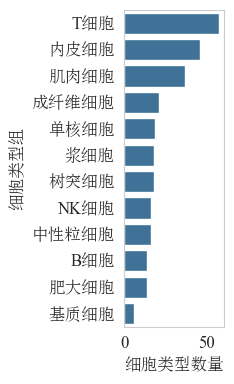

In [75]:
# 使用 Pandas 绘制柱状图
plt.figure(figsize=(2.5,4))
ax = sns.barplot(x='Num', y='Celltype name', data=df_sorted,color = "#3175A4")
plt.ylabel("细胞类型组")
plt.xlabel("细胞类型数量")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# 显示图表
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\9.jpg",dpi=1000)
plt.grid(False)

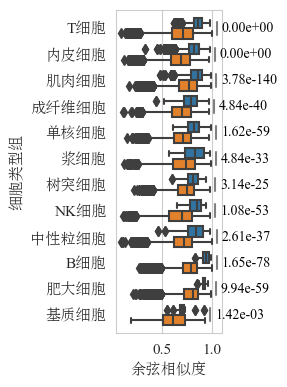

In [81]:
# 将数据转换为 DataFrame
# 设置全局字体大小
plt.rcParams['font.size'] = 11  # 设置默认字体大小

box_data = []
p_values = []
for group, values in data.items():
    for i, val in enumerate(values):
        label = 'Intra' if i == 0 else 'Inter'
        box_data.extend([(group, label, v) for v in val])

    # 计算每组两个列表之间的 p-value
    p_value = ttest_ind(values[0], values[1]).pvalue
    p_values.append((group, p_value))

df = pd.DataFrame(box_data, columns=['Group', 'List', 'Value'])

# 创建一个图形对象和子图对象
fig, ax = plt.subplots(figsize=(3, 4))  # 调整图形大小以适应纵向图

# 使用 seaborn 绘制箱线图（交换 x 和 y）
sns.boxplot(y='Group', x='Value', hue='List', data=df, ax=ax)

# 添加 p-value 到箱线图
for i, (group, p_value) in enumerate(p_values):
    # 获取当前组的两个箱线图的最大值位置
    max_x1 = df[(df['Group'] == group) & (df['List'] == 'Intra')]['Value'].max()
    max_x2 = df[(df['Group'] == group) & (df['List'] == 'Inter')]['Value'].max()
    max_x = max(max_x1, max_x2)

    # 在两个箱线图的右侧添加标示线
    ax.plot([max_x + 0.05, max_x + 0.05], [i - 0.25, i + 0.25], color='grey')

    # 在标示线右侧添加 p 值
    ax.text(max_x + 0.1, i, f'{p_value:.2e}', ha='left', va='center', fontsize=10, color='black')

# 设置图表标题和标签
ax.set_ylabel('细胞类型组')  # 纵轴标签
ax.set_xlabel('余弦相似度')  # 横轴标签

# 旋转 x 轴标签（如果需要）
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')  # 纵轴标签不旋转

# 设置图例标签
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Intra', 'Inter'], loc='upper right')
#隐藏图例（如果需要）
ax.get_legend().remove()

# # 隐藏纵轴刻度和标签
# ax.set_ylabel('')  # 移除纵轴标签
# ax.set_yticks([])  # 移除纵轴刻度
# ax.set_yticklabels([])  # 确保刻度标签也被移除

# 显示图表
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\8.png",dpi=1000)
plt.show()

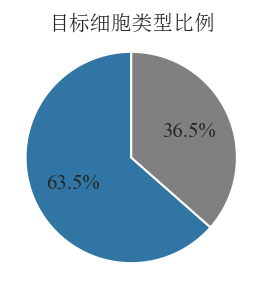

In [63]:
'''包含的细胞类型比例'''
ct_name = alltraits_significant.index
data = pd.DataFrame()
celltypes = ['b cell',' t cell','nk cell','fibroblast','mast cell','endothelial cell','neutrophil','plasma cell',"monocyte","basal cell","dendritic","muscle"]
celltypes_name = ['B细胞','T细胞','NK细胞','成纤维细胞','肥大细胞','内皮细胞','中性粒细胞','浆细胞',"单核细胞","基质细胞","树突细胞","肌肉细胞"]
for filter_type in celltypes:
    filtered_name = [item for item in ct_name if filter_type in item.lower()]
    filtered_df = cosine_similarities.loc[filtered_name]
    # data.append(filtered_df)
    data = pd.concat([data, filtered_df], axis=0)
# 计算每个列表的元素数量
sizes = [len(data.index), len(data.columns) - len(data.index)]
labels = ['目标细胞类型组', ' ']
colors = ['#3175A4','grey']
fig, ax = plt.subplots(figsize=(2, 2),dpi = 150)
ax.pie(sizes, 
       # labels=[ ], 
       colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title("目标细胞类型比例")
# 保证饼状图是圆形的
ax.axis('equal')
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\10.png",dpi=1000)
plt.show()

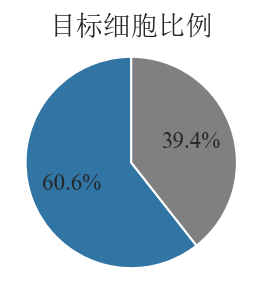

In [67]:
'''包含的细胞数量比例'''
data = pd.DataFrame()
celltypes = ['b cell',' t cell','nk cell','fibroblast','mast cell','endothelial cell','neutrophil','plasma cell',"monocyte","basal cell","dendritic","muscle"]
num_file = pd.read_excel(r"E:\00_CeSOP\data\24_tissues-celltype-cellnum.xlsx",sheet_name="tissue-celltype-cellnum")
for filter_type in celltypes:
    filtered_name = [item for item in num_file["celltype"] if filter_type in item.lower()]
    filtered_df = num_file[num_file["celltype"].isin(filtered_name)]
    data = pd.concat([data, filtered_df], axis=0)

# 计算每个列表的元素数量
sizes = [sum(data["cellnum"]), sum(num_file["cellnum"]) - sum(data["cellnum"])]
labels = ['Interest', 'No Interest']
colors = ['#3175A4','grey']
fig, ax = plt.subplots(figsize=(2, 2),dpi = 150)
ax.pie(sizes, 
       # labels=labels,
       colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title("目标细胞比例")
# 保证饼状图是圆形的
ax.axis('equal')
plt.savefig(r"E:\00_CeSOP\plot\figures\11.jpg",dpi=1000)
plt.show()

No NaN or inf values in the data.


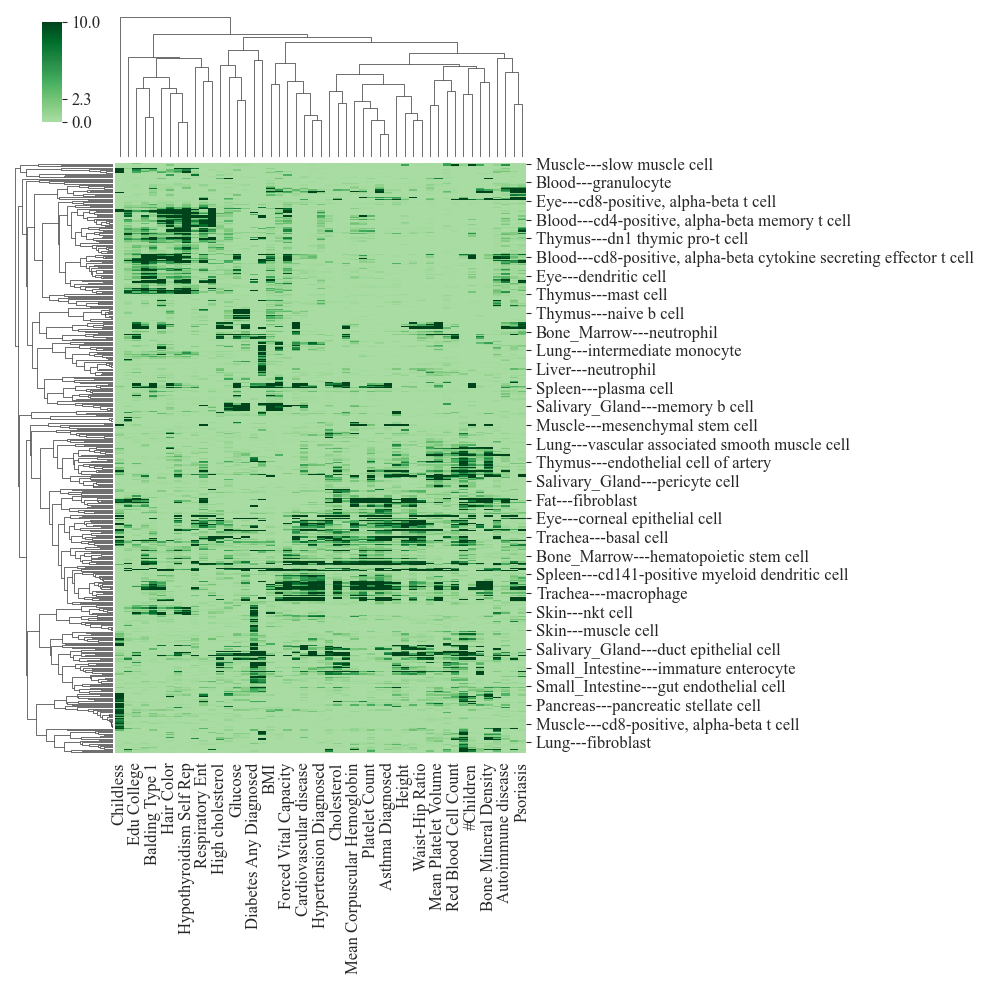

In [64]:
'''根据细胞类型特异性对细胞类型进行聚类，并输出聚类结果'''
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine


epsilon = 1e-10
core = "core"
traits_name = pd.read_excel(r"E:\00_CeSOP\data\49_traits.xlsx")
alltraits_significant = pd.DataFrame()
for trait in range(1,50):
    trait_name = traits_name[traits_name["Number"] == trait]["Trait name"].values[0]
    # trait_name = traits_name[traits_name["Number"] == trait]["Trait 名字"].values[0]
    df = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\celltypes\%s\top10_%s_lcczscore.csv"%(trait,core))
    df = df.sort_values(["tissue","celltype"])  
    df["log fisher's pvalue"] = -np.log10(df["fisher's pvalue"] + + epsilon)
    alltraits_significant[trait_name] = df["log fisher's pvalue"]
alltraits_significant.index = df["tissue"] + "---" + df["celltype"]
# 处理NaN和inf值
alltraits_significant = alltraits_significant.replace([np.inf, -np.inf], np.nan).dropna()
# 检查是否有NaN或inf值
if alltraits_significant.isnull().values.any():
    print("Data contains NaN or inf values.")
else:
    print("No NaN or inf values in the data.")

'''层次聚类'''
alltraits_significant_T = alltraits_significant.T
x = -np.log10(0.005 + epsilon)
cg = sns.clustermap(alltraits_significant, cmap='Greens', 
                    # yticklabels=True, xticklabels=False,
                    method='weighted', metric='cosine',
                    cbar_pos=(0.05, 0.87, 0.02, 0.1),
                    cbar_kws={'ticks': [0, x, 10]},
                    center=x)  #行是组织，列是性状

'''提取聚类结果'''
# 计算余弦距离矩阵
cosine_distance = pdist(alltraits_significant, metric='cosine')  # Transpose to calculate column distances
# 生成层次聚类
linkage_matrix = sch.linkage(cosine_distance, method='weighted')
# 划分簇，设置簇数为3
array = alltraits_significant.iloc[:, 0:-1].to_numpy()
cluster_assignments = sch.fcluster(linkage_matrix, t=20, criterion='maxclust')
# 添加簇分配结果到 DataFrame
alltraits_significant['Cluster'] = cluster_assignments

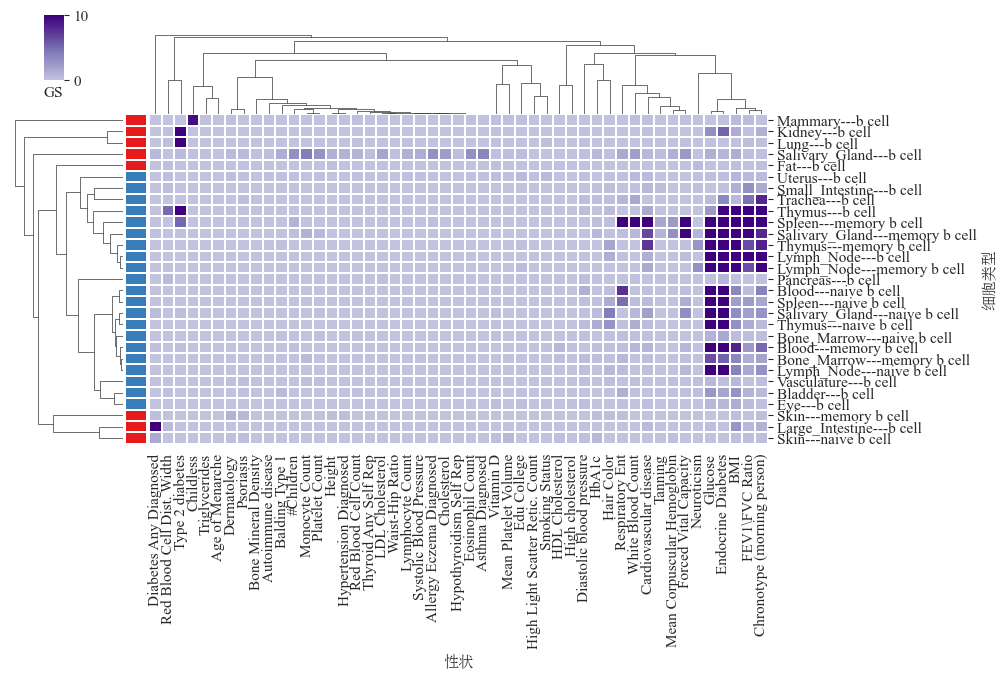

In [33]:
# ct_name = list(alltraits_significant.index)
# # 筛选包含 'b cell' 子串的所有元素
# filtered_name = [item for item in ct_name if 'b cell' in item.lower()]
# filtered_bcell = [item for item in filtered_name if 'club cell' not in item.lower()]
# filtered_df = alltraits_significant.loc[filtered_bcell]
# 
# x = -np.log10(0.005 + epsilon)
# # 设置颜色映射
# # 根据第一列的值设置标签
# labels = np.where((filtered_df.iloc[:, -1] == 8) | (filtered_df.iloc[:, -1] == 11), 1, 0)
# palette = sns.color_palette('Set1', len(np.unique(labels)))
# lut = dict(zip(np.unique(labels), palette))
# row_colors = pd.Series(labels, index=filtered_df.index).map(lut)
# 
# cg = sns.clustermap(filtered_df.iloc[:,0:-1], cmap='Purples',figsize = (10,6.5),
#                     row_colors=row_colors,
#                     yticklabels=True, xticklabels=True,
#                     linewidths=0.1, linecolor='white',
#                     # row_cluster=True, col_cluster=False, 
#                     row_cluster=True, col_cluster=True, 
#                     method='weighted', metric='cosine',
#                     cbar_pos=(0.05, 0.9, 0.02, 0.1),
#                    dendrogram_ratio=(0.15, 0.2),
#                    center=x)
# 
# # 添加图例
# for label in np.unique(labels):
#     cg.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)
# 
# # 设置横轴和纵轴的标签
# cg.ax_heatmap.set_xlabel("性状")  # 设置横轴标签
# cg.ax_heatmap.set_ylabel("细胞类型")  # 设置纵轴标签
# # 设置 colorbar 的标签
# cg.ax_cbar.set_xlabel("GS", fontsize=11)  # 设置颜色条的标签
# # 设置 colorbar 的刻度标签
# # g.ax_cbar.set_yticklabels(["0", "-log10(0.005)", "10"])  # 替换颜色条的数值标签
# # 保存图片到文件
# cg.savefig(r"E:\00_CeSOP\plot\figures\12.png",dpi=1000)

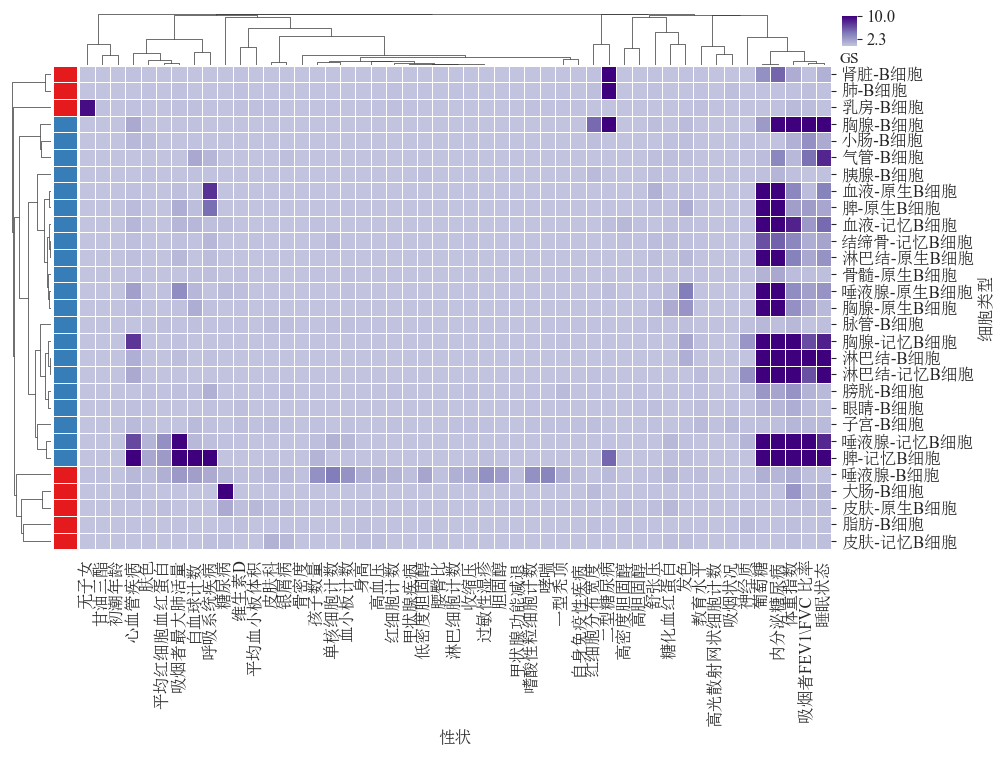

In [71]:
alltraits_significant['Cluster'] = cluster_assignments
ct_name = list(alltraits_significant.index)
# 筛选包含 'b cell' 子串的所有元素
filtered_name = [item for item in ct_name if 'b cell' in item.lower()]
filtered_bcell = [item for item in filtered_name if 'club cell' not in item.lower()]
filtered_df = alltraits_significant.loc[filtered_bcell]

x = -np.log10(0.005 + epsilon)
# 设置颜色映射
# 根据第一列的值设置标签

traits_name = pd.read_excel(r"E:\00_CeSOP\results\49_traits.xlsx")
trait_name = list(traits_name["Trait 名字"])
filtered_df.columns = trait_name + filtered_df.columns[-1:].tolist()
filtered_df.index = ["膀胱-B细胞","血液-记忆B细胞","血液-原生B细胞","结缔骨-记忆B细胞","骨髓-原生B细胞","眼睛-B细胞","脂肪-B细胞","肾脏-B细胞","大肠-B细胞","肺-B细胞",
                     "淋巴结-B细胞","淋巴结-记忆B细胞","淋巴结-原生B细胞","乳房-B细胞","胰腺-B细胞","唾液腺-B细胞","唾液腺-记忆B细胞","唾液腺-原生B细胞","皮肤-记忆B细胞","皮肤-原生B细胞",
                     "小肠-B细胞","脾-记忆B细胞","脾-原生B细胞","胸腺-B细胞","胸腺-记忆B细胞","胸腺-原生B细胞","气管-B细胞","子宫-B细胞","脉管-B细胞"]

labels = np.where((filtered_df.iloc[:, -1] == 8) | (filtered_df.iloc[:, -1] == 11), 1, 0)
palette = sns.color_palette('Set1', len(np.unique(labels)))
lut = dict(zip(np.unique(labels), palette))
row_colors = pd.Series(labels, index=filtered_df.index).map(lut)

cg = sns.clustermap(filtered_df.iloc[:, 0:-1], cmap='Purples', figsize=(10, 7.5),
                    row_colors=row_colors,
               yticklabels=True ,  xticklabels=True,linewidths = 0.5, 
                   method='complete', metric='cosine',
                    cbar_pos=(0.85, 0.93, 0.015, 0.04),
                   # cbar_pos=(0.9, 0.87, 0.02, 0.05),
                   cbar_kws={'ticks':[x,10]},
                   # cbar_kws={'ticks':[0,"-log10(0.005)",10]},
                   dendrogram_ratio=(0.05, 0.1),
                   center=x)
import matplotlib.ticker as ticker
# 手动格式化 colorbar 刻度为整数
colorbar = cg.cax
colorbar.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # 无小数点整数

# 添加图例
for label in np.unique(labels):
    cg.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)

# 设置横轴和纵轴的标签
cg.ax_heatmap.set_xlabel("性状")  # 设置横轴标签
cg.ax_heatmap.set_ylabel("细胞类型")  # 设置纵轴标签
# 设置 colorbar 的标签
cg.ax_cbar.set_xlabel("GS", fontsize=11)  # 设置颜色条的标签
# 设置 colorbar 的刻度标签
# g.ax_cbar.set_yticklabels(["0", "-log10(0.005)", "10"])  # 替换颜色条的数值标签
# 保存图片到文件
cg.savefig(r"E:\00_CeSOP\plot\figures-zh\12.pdf", dpi=1000)

In [ ]:
## R包，哮喘的层次结果。

# library(ggraph)
# library(igraph)
# library(tidyverse)
# library(RColorBrewer) 
# set.seed(1)
# epsilon = 1e-10
# tissue_core = read.csv("E:\\00_CeSOP\\results\\asthma\\trait-cells-in-tissues-and-celltypes\\tissues\\top10_core_lcczscore.csv"
#                        , na.strings = "", fileEncoding = "GB18030")
# celltype_core = read.csv("E:\\00_CeSOP\\results\\asthma\\trait-cells-in-tissues-and-celltypes\\celltypes\\top10_core_lcczscore.csv"
#                          , na.strings = "", fileEncoding = "GB18030")[,c('tissue','tissuename','celltype','celltypename','fisher.s.pvalue')]
# 
# # 找到 "column3" 小于 0.05 的行的索引
# rows_to_change <- celltype_core$fisher.s.pvalue > 0.005
# # 将符合条件的行的 "column2" 改为 "other"
# celltype_core$celltype[rows_to_change] <- "其它"
# celltype_core$fisher.s.pvalue[rows_to_change] <- 0.005
# celltype_core = unique(celltype_core)
# 
# #d11 = data.frame(from="Asthma", to=tissue_core[['tissuename']])
# d11 = data.frame(from="哮喘", to=tissue_core[['tissuename']])
# d21 = data.frame(from=celltype_core[['tissuename']],
#                  to=paste(celltype_core[['tissuename']],celltype_core[['celltypename']], sep = "---"))
# 
# 
# edges<-rbind(d11[,1:2], d21[,1:2])
# 
# vertices_name<-unique(c(as.character(edges$from), as.character(edges$to)))
# value1 <-rbind(1, tissue_core['fisher.s.pvalue'], celltype_core['fisher.s.pvalue'])
# vertices<-data.frame(name = vertices_name, value = -log10(value1['fisher.s.pvalue'] + epsilon))
# rownames(vertices)<-vertices_name
# 
# d2<-d21 %>% 
#   mutate(order2=as.numeric(factor(from,
#                                   levels=unique(from)[sort(summary (as.factor(from)),index.return=TRUE,decreasing = T)$ix],
#                                   order=TRUE)))%>% 
#   arrange(order2)
# 
# # 执行 left_join
# d2 <- d2 %>%
#   left_join(vertices, by = c("to" = "name"))
# # 按照 order2 和 value 排序
# d2 <- d2 %>%
#   arrange(order2, desc(fisher.s.pvalue))
# 
# edges<-rbind(d11[,1:2], d2[,1:2])
# list_unique<-unique(c(as.character(edges$from), as.character(edges$to)))
# vertices = data.frame(
#   name = list_unique, 
#   value = vertices[list_unique,'fisher.s.pvalue']
# ) 
# 
# 
# vertices$group<-edges$from[match(vertices$name, edges$to)]
# 
# vertices$id<-NA
# myleaves<-which(is.na( match(vertices$name, edges$from) ))
# nleaves<-length(myleaves)
# vertices$id<-nleaves/360*90
# vertices$id[ myleaves]<-seq(1:nleaves)
# 
# vertices$angle<-90 - 360 * vertices$id / nleaves
# vertices$angle<-ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)
# 
# mygraph <- graph_from_data_frame( edges, vertices, directed = TRUE )
# 
# ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
#   geom_edge_diagonal(aes(colour=..index..)) +
#   scale_edge_colour_distiller(palette = "RdPu") +
#   
#   # 设定节点颜色（根据层级）
#   geom_node_point(aes(x = x*1.07, y=y*1.07, 
#                       fill = case_when(
#                         name == "Asthma" ~ "black",       # 最内层设为黑色
#                         name %in% d11$to ~ "grey",        # 第一层（组织层）设为灰色
#                         TRUE ~ group                      # 第二层（细胞层）使用默认调色板
#                       ), 
#                       size=value*0.8), 
#                   shape=21, stroke=0.2, color='grey', alpha=0.8) +
#   
#   # 设定文本颜色、字体大小和右对齐
#   geom_node_text(aes(x = x*1.25, y=y*1.25, angle = angle, label=name, 
#                      color = case_when(
#                        name == "Asthma" ~ "black",   # 最内层文本黑色
#                        name %in% d11$to ~ "grey",    # 第一层文本灰色
#                        TRUE ~ group                  # 其余仍然使用默认调色板
#                      )),
#                  size=4, alpha=1) +  # 设置右对齐 (hjust = 1)
#   
#   # 调色板设置
#   scale_fill_manual(values = c("black", "grey", rep(brewer.pal(20,"Paired"), 30))) +
#   scale_colour_manual(values = c("black", "grey", rep(brewer.pal(20,"Paired"), 30))) +
#   
#   scale_size_continuous(range = c(0.1,7)) +
#   expand_limits(x = c(-1.3, 1.3), y = c(-1.3, 1.3)) +
#   theme_void() +
#   theme(
#     legend.position="none",
#     plot.margin=unit(c(0,0,0,0),"cm"),
#     text = element_text(size = 4)  # 设置所有字体大小为11
#   )
# 
# ggsave("E:\\00_CeSOP\\plot\\figures\\asthma.png",
#        width = 10,             # 宽
#        height = 10,            # 高
#        units = "in",          # 单位
#        dpi = 1000              # 分辨率DPI
# )